<a href="https://colab.research.google.com/github/kkettip/datasci_6_anova/blob/main/datasci_6_anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ucimlrepo
## bringing in data
from ucimlrepo import fetch_ucirepo

##bring in packages for dataframe + stats
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

## for visualization
import matplotlib.pyplot as plt


In [4]:
# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [5]:
# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

# metadata
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata)

# variable information
print(diabetes_130_us_hospitals_for_years_1999_2008.variables)


{'uci_id': 296, 'name': 'Diabetes 130-US hospitals for years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

Research Question: How do the race of the patient (race) and
their A1C test results (A1Cresult) jointly influence the duration of
their hospital stay (time_in_hospital)?

Factor 1 (Race - race): Caucasian, Asian, African American,
Hispanic, Other

Factor 2 (A1C test result - a1c): >8%, 7%, Normal, None (not
measure)

Dependent Variable: Duration hospital stay (time_in_hospital)

In [6]:
df = pd.DataFrame(X)
df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [7]:
df.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [8]:
df = df[['race', 'time_in_hospital', 'A1Cresult']]
df.sample(10)

,race,time_in_hospital,A1Cresult
33683,AfricanAmerican,1,None
99821,Hispanic,7,Norm
88739,Caucasian,5,Norm
87426,Caucasian,6,None
51742,Caucasian,2,None
72889,AfricanAmerican,4,None
14963,Caucasian,8,None
50263,AfricanAmerican,3,None
75911,Caucasian,3,None
29491,Caucasian,5,None


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['time_in_hospital'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_1, *['race'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['A1Cresult'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_3, *['time_in_hospital', 'count()', 'race'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_4, *['time_in_hospital', 'count()', 'A1Cresult'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_5, *['time_in_hospital'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_6, *['race', 'A1Cresult'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_7, *['time_in_hospital', 'race'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_8, *['time_in_hospital', 'A1Cresult'], **{'inner': 'stick'})
chart

In [9]:
df.to_csv('diabetes.csv')

In [11]:
df = df.dropna()
df.sample(10)

,race,time_in_hospital,A1Cresult
11311,Caucasian,1,None
77948,Caucasian,3,None
61185,Caucasian,5,None
21012,Caucasian,3,Norm
88027,Caucasian,5,None
90649,Hispanic,3,None
87244,Caucasian,14,None
15788,Caucasian,8,>8
78455,Caucasian,8,None
13297,AfricanAmerican,5,None


In [12]:
print('Main DV: ', stats.shapiro(df['time_in_hospital']))

Main DV:  ShapiroResult(statistic=0.8867098093032837, pvalue=0.0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


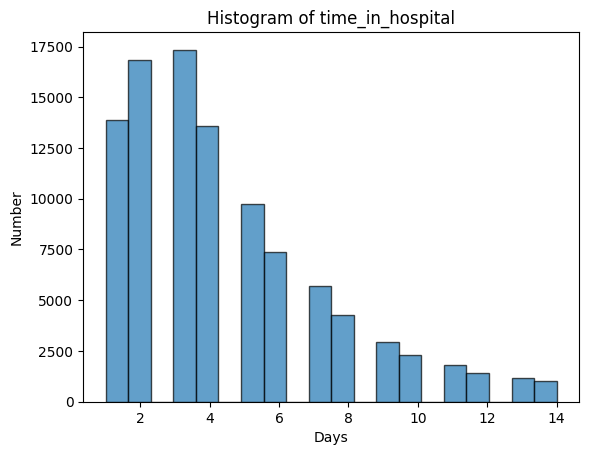

In [17]:
plt.hist(df['time_in_hospital'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of time_in_hospital')
plt.xlabel('Days')
plt.ylabel('Number')
plt.show()

Shapiro-Wilk Test

In [14]:
groups = df.groupby(['race', 'A1Cresult'])

for (race, A1Cresult), group_df in groups:
    _, p_value = stats.shapiro(group_df['time_in_hospital'])

    print(f"Group ({race}, {A1Cresult}):")
    print(f"P-value from Shapiro-Wilk Test: {p_value}\n")

Group (AfricanAmerican, >7):
P-value from Shapiro-Wilk Test: 1.8906119489850806e-16

Group (AfricanAmerican, >8):
P-value from Shapiro-Wilk Test: 6.7359146155303186e-34

Group (AfricanAmerican, None):
P-value from Shapiro-Wilk Test: 0.0

Group (AfricanAmerican, Norm):
P-value from Shapiro-Wilk Test: 2.9696700824519264e-25

Group (Asian, >7):
P-value from Shapiro-Wilk Test: 0.0023467366117984056

Group (Asian, >8):
P-value from Shapiro-Wilk Test: 2.233798113593366e-05

Group (Asian, None):
P-value from Shapiro-Wilk Test: 2.6558121925662052e-21

Group (Asian, Norm):
P-value from Shapiro-Wilk Test: 0.0007482930086553097

Group (Caucasian, >7):
P-value from Shapiro-Wilk Test: 1.7925673399754353e-38

Group (Caucasian, >8):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, None):
P-value from Shapiro-Wilk Test: 0.0

Group (Caucasian, Norm):
P-value from Shapiro-Wilk Test: 1.930148504761003e-41

Group (Hispanic, >7):
P-value from Shapiro-Wilk Test: 2.1721559733123286e-06

Group (Hispanic

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Levene's Test

In [15]:
df['race'] = df['race'].astype(str)
df['A1Cresult'] = df['A1Cresult'].astype(str)

In [16]:
# Levene's Test
stats.levene(
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == '>8'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == '>7'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == 'Norm'],
    df['time_in_hospital'][df['race'] == 'AfricanAmerican'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Asian'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Caucasian'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Hispanic'][df['A1Cresult'] == 'None'],
    df['time_in_hospital'][df['race'] == 'Other'][df['A1Cresult'] == 'None'],
)


LeveneResult(statistic=7.450102003925798, pvalue=9.580811219790571e-21)